In [35]:
import numpy as np
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
# export_graphviz : 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz ; 나무 구조 시각화(.dot 확장자 파일 불러오기)
import graphviz

# 데이터 분할 : train, test
from sklearn.model_selection import train_test_split
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV
# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [2]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/HMEQ.csv', engine='python')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [3]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [5]:
# 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [6]:
# 설명변수, 목표변수 나눌것
df_raw_x = df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_raw_y = df_raw_dummy['BAD']

# train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

In [9]:
# 랜덤 포레스트 모델 생성
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 0.992
Accuracy on test set : 0.944


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# n_estimator : 트리 수 변경 : 1 ~ 150
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [11]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


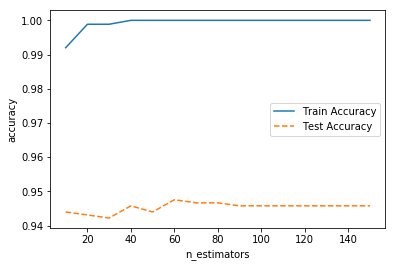

In [12]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

In [13]:
# n_estimators : 트리수 변경에 따른 모델 oob error 변화
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not hav

Text(0.5, 0, 'n_estimators')

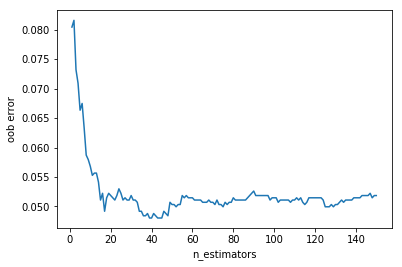

In [14]:
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [15]:
# 트리 수 지정
n_estimators = 100

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf = RandomForestClassifier(max_depth=v_max_depth, n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [17]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


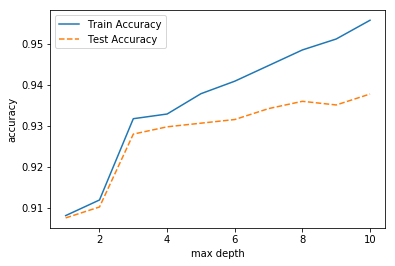

In [18]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth=4,
                                n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [20]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.933,0.929
1,20,0.933,0.929
2,30,0.932,0.929
3,40,0.933,0.929
4,50,0.932,0.929
5,60,0.932,0.929
6,70,0.932,0.929
7,80,0.932,0.928
8,90,0.932,0.928
9,100,0.932,0.928


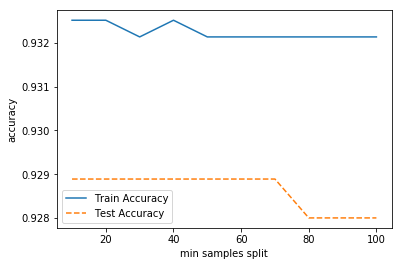

In [21]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.legend()

In [22]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# min_samples_leaf : 분할하기 위한 노드의 최소 샘플 수
para_leaf = [n_leaf * 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf, max_depth=4,
                                n_estimators=100, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [23]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.930,0.928
1,20,0.927,0.925
2,30,0.927,0.924
3,40,0.920,0.916
4,50,0.908,0.908
5,60,0.908,0.908
6,70,0.908,0.908
7,80,0.908,0.908
8,90,0.908,0.908
9,100,0.908,0.908


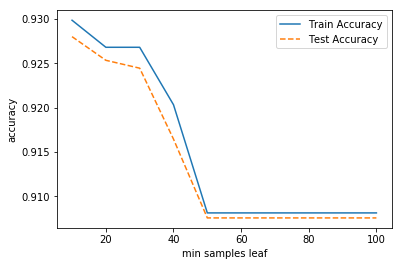

In [24]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples leaf')
plt.ylabel('accuracy')
plt.legend()

In [26]:
rf_final = RandomForestClassifier(min_samples_leaf=20, max_depth=4, n_estimators=100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
# 평가
y_pred = rf_final.predict(df_test_x)

# train 데이터 셋 정확도
print('Accuracy on training set : {:.3f}'.format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set : {:.3f}'.format(rf_final.score(df_test_x, df_test_y)))
# confusion matrix
print('Confusion matrix : \n{}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 0.927
Accuracy on test set : 0.925
Confusion matrix : 
[[1021    0]
 [  84   20]]


In [28]:
# 변수명
v_feature_name = df_train_x.columns
# tree.feature_importance_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.475
5,DELINQ,0.175
4,DEROG,0.066
6,CLAGE,0.061
7,NINQ,0.058
8,CLNO,0.051
0,LOAN,0.039
2,VALUE,0.027
3,YOJ,0.014
1,MORTDUE,0.013


Text(0, 0.5, '설명변수')

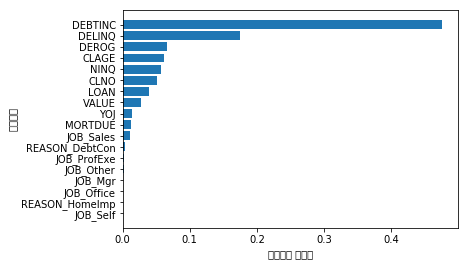

In [29]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [30]:
estimator = RandomForestClassifier(n_estimators=100, random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {'max_depth' : para_depth, 'min_samples_leaf' : para_leaf}
# 정확도가 높은 최적 paramter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)
print('best estimator model : \n'.format(grid_rf.best_estimator_))
print('\nbest parameter : \n'.format(grid_rf.best_params_))
print('\nbest score : \n'.format(grid_rf.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 


best parameter : 


best score : 



## 실습

In [31]:
df_tele = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/통신고객이탈.csv', engine='python')
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [32]:
df_tele.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [33]:
# 명목형 변수들의 distinct한 값의 수
obj_cols = df_tele.select_dtypes('object').columns
for col in obj_cols:
    _n = len(df_tele[col].value_counts())
    print(col, " : ", str(_n))

CHURN  :  2
CUSTOMER_ID  :  930
GENDER  :  2
CHARGE_TYPE  :  5
HANDSET  :  11
USAGE_BAND  :  6


In [36]:
# CHURN 변수 데이터 전처리
df_tele['CHURN'] = np.where(df_tele['CHURN'] == 'Active', 0, 1)
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [37]:
df_tele.drop('CUSTOMER_ID', axis=1, inplace=True)

In [38]:
# get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_tele_dummy = pd.get_dummies(df_tele)
# 더미변수 생성도니 데이터의 상위 5개 row를 확인
df_tele_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# 설명변수, 목표변수 나눌것
df_tele_x = df_tele_dummy.drop('CHURN', axis=1, inplace=False)
df_tele_y = df_tele_dummy['CHURN']

# train_test_split
dft_train_x, dft_test_x, dft_train_y, dft_test_y = train_test_split(df_tele_x, df_tele_y, test_size=0.3, random_state=1234)

In [44]:
# 랜덤 포레스트 모델 생성
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(dft_train_x, dft_train_y)
# train 데이터 셋 정확도
print("Accuracy on training set : {:.3f}".format(rf_uncustomized.score(dft_train_x, dft_train_y)))
# test 데이터 셋 정확도
print("Accuracy on test set : {:.3f}".format(rf_uncustomized.score(dft_test_x, dft_test_y)))

Accuracy on training set : 0.988
Accuracy on test set : 0.867


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# n_estimator : 트리 수 변경 : 1 ~ 150
para_n_tree = [n_tree * 10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree :
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(dft_train_x, dft_train_y)
    train_accuracy.append(rf.score(dft_train_x, dft_train_y))
    test_accuracy.append(rf.score(dft_test_x, dft_test_y))
    
# 데이터 테이블로 저장
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy

In [46]:
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.988,0.867
1,20,0.997,0.878
2,30,1.000,0.896
3,40,1.000,0.896
4,50,1.000,0.903
5,60,1.000,0.896
6,70,1.000,0.910
7,80,1.000,0.910
8,90,1.000,0.907
9,100,1.000,0.910


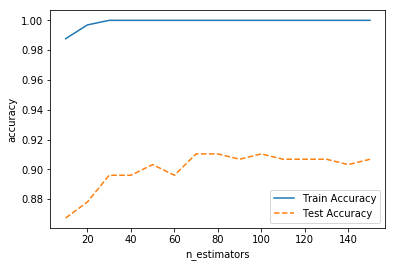

In [47]:
# 모델 정확도 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.legend()

In [48]:
# n_estimators : 트리수 변경에 따른 모델 oob error 변화
oob_error = []

for v_n_estimators in range(1, 151):
    rf = RandomForestClassifier(n_estimators=v_n_estimators, oob_score=True, random_state=1234)
    rf.fit(dft_train_x, dft_train_y)
    oob_error.append(1 - rf.oob_score_)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not hav

Text(0.5, 0, 'n_estimators')

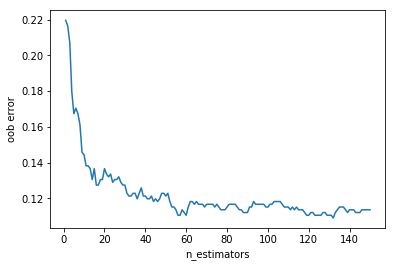

In [49]:
plt.plot(range(1, 151), oob_error)
plt.ylabel('oob error')
plt.xlabel('n_estimators')

In [50]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    rf = RandomForestClassifier(max_depth=v_max_depth, n_estimators=80, random_state=1234)
    rf.fit(dft_train_x, dft_train_y)
    train_accuracy.append(rf.score(dft_train_x, dft_train_y))
    test_accuracy.append(rf.score(dft_test_x, dft_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [51]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.791,0.842
1,2,0.791,0.842
2,3,0.860,0.871
3,4,0.877,0.867
4,5,0.897,0.885
5,6,0.912,0.910
6,7,0.937,0.903
7,8,0.943,0.907
8,9,0.948,0.907
9,10,0.955,0.903


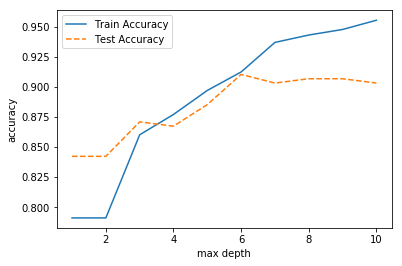

In [52]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()

In [53]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split :
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth=6,
                                n_estimators=80, random_state=1234)
    rf.fit(dft_train_x, dft_train_y)
    train_accuracy.append(rf.score(dft_train_x, dft_train_y))
    test_accuracy.append(rf.score(dft_test_x, dft_test_y))
    
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [54]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.897,0.907
1,20,0.896,0.903
2,30,0.891,0.896
3,40,0.885,0.896
4,50,0.879,0.896
5,60,0.874,0.896
6,70,0.876,0.896
7,80,0.871,0.896
8,90,0.871,0.885
9,100,0.869,0.885


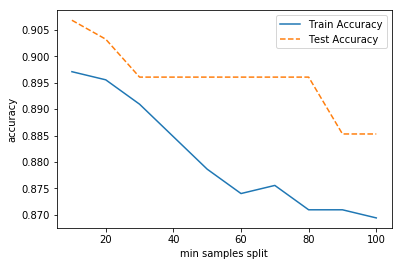

In [55]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples split')
plt.ylabel('accuracy')
plt.legend()

In [59]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# min_samples_leaf : 분할하기 위한 노드의 최소 샘플 수
para_leaf = [n_leaf for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf :
    rf = RandomForestClassifier(min_samples_leaf=v_min_samples_leaf, min_samples_split=10, max_depth=6,
                                n_estimators=80,random_state=1234)
    rf.fit(dft_train_x, dft_train_y)
    train_accuracy.append(rf.score(dft_train_x, dft_train_y))
    test_accuracy.append(rf.score(dft_test_x, dft_test_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [60]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,1,0.897,0.907
1,2,0.900,0.907
2,3,0.899,0.903
3,4,0.896,0.903
4,5,0.899,0.903
5,6,0.899,0.900
6,7,0.902,0.903
7,8,0.889,0.896
8,9,0.886,0.889
9,10,0.886,0.896


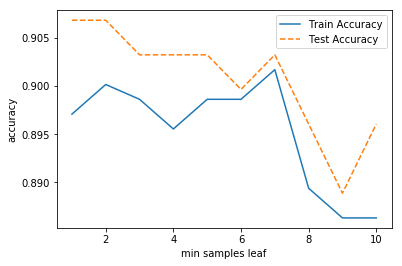

In [61]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.xlabel('min samples leaf')
plt.ylabel('accuracy')
plt.legend()

In [62]:
rf_final = RandomForestClassifier(min_samples_leaf=7, min_samples_split=10, max_depth=6, n_estimators=80, random_state=1234)
rf_final.fit(dft_train_x, dft_train_y)
# 평가
y_pred = rf_final.predict(dft_test_x)

# train 데이터 셋 정확도
print('Accuracy on training set : {:.3f}'.format(rf_final.score(dft_train_x, dft_train_y)))
# test 데이터 셋 정확도
print('Accuracy on test set : {:.3f}'.format(rf_final.score(dft_test_x, dft_test_y)))
# confusion matrix
print('Confusion matrix : \n{}'.format(confusion_matrix(dft_test_y, y_pred)))

Accuracy on training set : 0.902
Accuracy on test set : 0.903
Confusion matrix : 
[[230   5]
 [ 22  22]]


In [63]:
# 변수명
v_feature_name = dft_train_x.columns
# tree.feature_importance_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_
# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values('Importance', ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.239
2,DROPPED_CALLS,0.155
20,HANDSET_CAS30,0.097
8,TOTAL_CALLS_TIME,0.075
4,PEAK_CALLS_TIME,0.065
3,PEAK_CALLS_NO,0.046
0,AGE,0.044
1,SERVICE_DURATION,0.041
16,HANDSET_ASAD170,0.035
7,TOTAL_CALLS_NO,0.033


Text(0, 0.5, '설명변수')

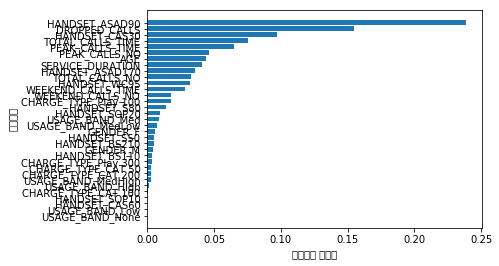

In [66]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

In [67]:
estimator = RandomForestClassifier(n_estimators=100, random_state=1234)
# 구하고자 하는 parameter와 범위
param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split, 'min_samples_leaf' : para_leaf}
# 정확도가 높은 최적 paramter 찾기
grid_rf = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)
print('best estimator model : \n'.format(grid_rf.best_estimator_))
print('\nbest parameter : \n'.format(grid_rf.best_params_))
print('\nbest score : \n'.format(grid_rf.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 


best parameter : 


best score : 

